In [14]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

circles_data, circles_data_labels = datasets.make_circles(n_samples=100, factor=0.1, noise=0.1) 

In [15]:
circles_data_labels

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

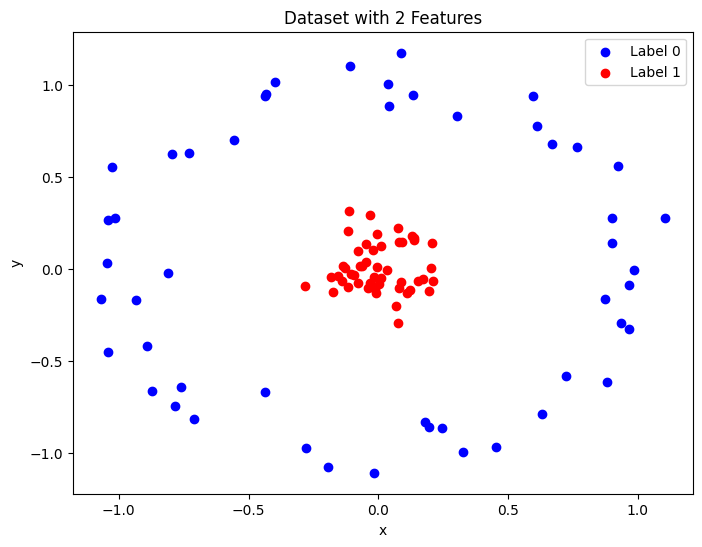

In [16]:

def plot_data(features, labels):
    blue_points = features[labels == 0]
    red_points = features[labels == 1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Label 0')
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Label 1')
    
    plt.title('Dataset with 2 Features')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

plot_data(circles_data, circles_data_labels)


In [17]:
X = torch.Tensor(circles_data)
y = torch.Tensor(circles_data_labels).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

print("Training set size:", len(train_dataset))
print("Test set size:", len(test_dataset))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


Training set size: 70
Test set size: 30


In [59]:
class SimpleNN(nn.Module):
    def __init__(self, channel):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, channel)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(channel, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x



In [60]:
circles_data.shape, circles_data_labels.shape

((100, 2), (100,))

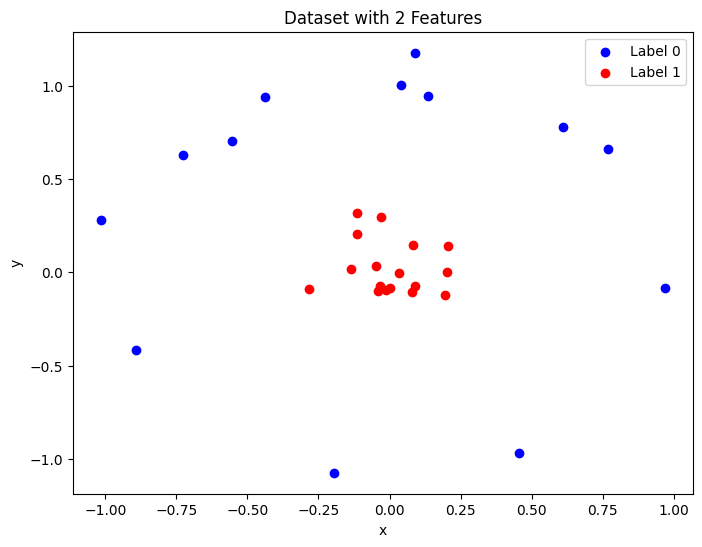

In [61]:

def get_all_features_labels(dataloader):
    all_features = []
    all_labels = []

    for features, labels in dataloader:
        all_features.append(features)
        all_labels.append(labels)

    all_features = torch.cat(all_features, dim=0)
    all_labels = torch.cat(all_labels, dim=0)

    return all_features, all_labels

all_features, all_labels = get_all_features_labels(test_loader)
plot_data(all_features, all_labels.flatten())


In [62]:
all_features.shape, all_labels.flatten().shape

(torch.Size([30, 2]), torch.Size([30]))

In [63]:
model = SimpleNN(7)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 9:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 10/1000, Loss: 0.7568027973175049
Epoch 20/1000, Loss: 0.6995055079460144
Epoch 30/1000, Loss: 0.5950146317481995
Epoch 40/1000, Loss: 0.6158033013343811
Epoch 50/1000, Loss: 0.6665197014808655
Epoch 60/1000, Loss: 0.630759060382843
Epoch 70/1000, Loss: 0.7042453289031982
Epoch 80/1000, Loss: 0.5979049801826477
Epoch 90/1000, Loss: 0.504186749458313
Epoch 100/1000, Loss: 0.5649999976158142
Epoch 110/1000, Loss: 0.5044426918029785
Epoch 120/1000, Loss: 0.4055964946746826
Epoch 130/1000, Loss: 0.567103922367096
Epoch 140/1000, Loss: 0.41536590456962585
Epoch 150/1000, Loss: 0.47821903228759766
Epoch 160/1000, Loss: 0.5726702809333801
Epoch 170/1000, Loss: 0.35870230197906494
Epoch 180/1000, Loss: 0.31659355759620667
Epoch 190/1000, Loss: 0.409504771232605
Epoch 200/1000, Loss: 0.15581536293029785
Epoch 210/1000, Loss: 0.4524899423122406
Epoch 220/1000, Loss: 0.3470176160335541
Epoch 230/1000, Loss: 0.36355528235435486
Epoch 240/1000, Loss: 0.5596908926963806
Epoch 250/1000, Loss: 0

In [64]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs.data > 0.5).float()  # Convert probabilities to binary predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

test_accuracy = evaluate_model(model, test_loader)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 100.00%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(100, 2)
(100,)
(229, 218) (229, 218)
torch.Size([229, 218])


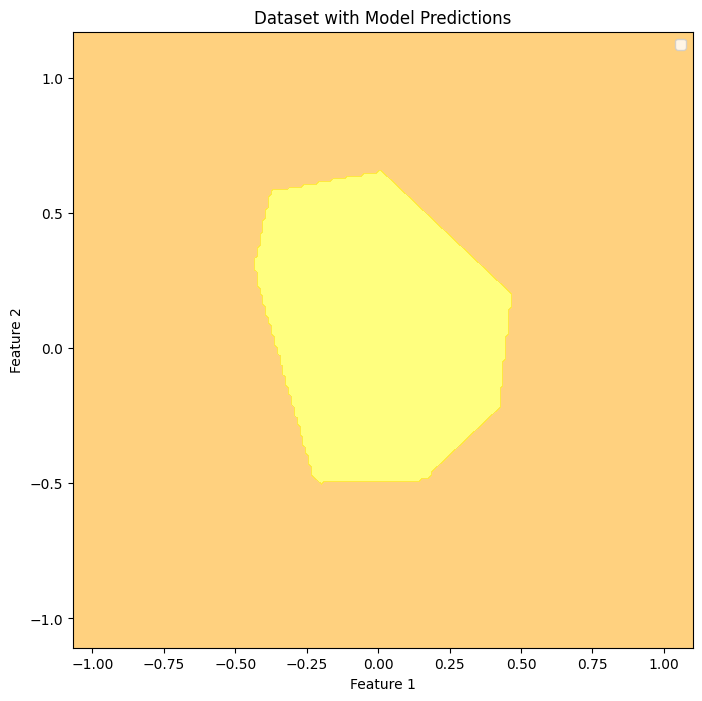

In [109]:
def plot_data_with_predictions(model, features, labels):
    print(type(features))
    print(type(labels))
    print(features.shape)
    print(labels.shape)
    
    f0_min, f0_max = features[:, 0].min(), features[:, 0].max()
    f1_min, f1_max = features[:, 1].min(), features[:, 1].max()
    f0, f1 = np.meshgrid(np.arange(f0_min, f0_max, 0.01),
                         np.arange(f1_min, f1_max, 0.01))
    print(f0.shape, f1.shape)

    inputs = torch.Tensor(np.c_[f0.ravel(), f1.ravel()])
                         
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        outputs = outputs.reshape(f0.shape)
        outputs = (outputs > 0.5).float()
    print(outputs.shape)
    plt.figure(figsize=(8, 8))
    # plt.scatter(f0, c='gray')
        
    plt.contourf(f0, f1, outputs, alpha=0.5, levels=[-1, 0.5, 2], colors=['orange', 'yellow'])
    # plt.scatter(f0, f1, c='gray')

    # plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', label='Label 0')
    # plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', label='Label 1')

    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_data_with_predictions(model, circles_data, circles_data_labels)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(100, 2)
(100,)
(500, 500) (500, 500)


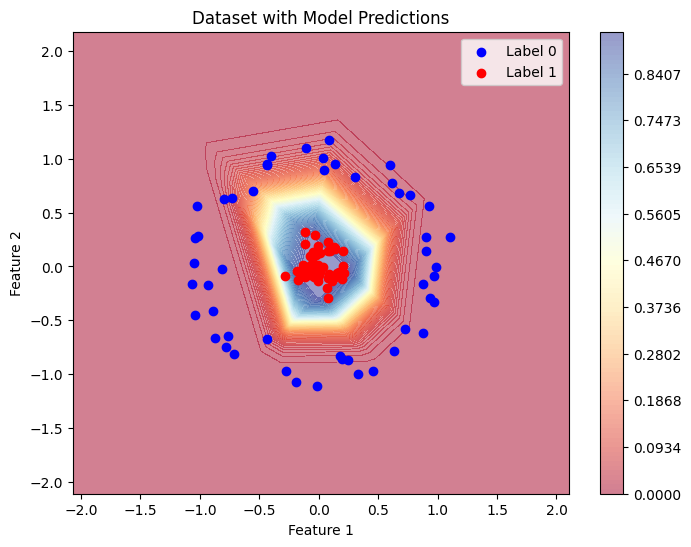

In [74]:
def plot_data_with_predictions(model, features, labels):
    print(type(features))
    print(type(labels))
    print(features.shape)
    print(labels.shape)
    
    # Adjust the min and max to add a little border
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    print(xx.shape, yy.shape)

    # Predict over the mesh grid
    model.eval()
    with torch.no_grad():
        Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    # Use a continuous colormap to reflect probabilities or model scores
    contour = plt.contourf(xx, yy, Z, alpha=0.5, levels=np.linspace(Z.min(), Z.max(), 100), cmap='RdYlBu')
    plt.colorbar(contour)  # Add a colorbar to interpret the values

    # Plot the original data points with labels
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', label='Label 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', label='Label 1')

    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Ensure you define 'model', 'circles_data', and 'circles_data_labels' before calling this function.
plot_data_with_predictions(model, circles_data, circles_data_labels)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(30, 2)
(30,)


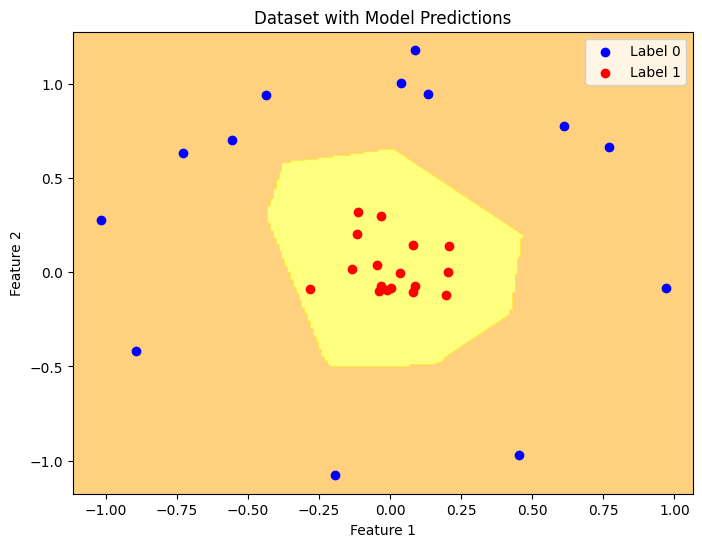

In [75]:
def plot_data_with_predictions(model, dataloader):
    

    all_features = []
    all_labels = []
    
    # Iterate over the DataLoader to accumulate all features and labels
    for batch_features, batch_labels in dataloader:
        # Assuming features and labels are tensors, adjust if necessary
        all_features.append(batch_features.numpy())
        all_labels.append(batch_labels.numpy())

    # Concatenate all features and labels
    features = np.concatenate(all_features, axis=0)
    labels = np.concatenate(all_labels, axis=0).flatten()
    print(type(features))
    print(type(labels))
    print(features.shape)
    print(labels.shape)

    
    # Generate a mesh grid to plot decision boundary
    x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the mesh grid
    model.eval()
    with torch.no_grad():
        Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        Z = (Z > 0.5).float()  # Convert to binary predictions

    # print(labels == 0)
    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, levels=[-1, 0.5, 2], colors=['orange', 'yellow'])
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', label='Label 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', label='Label 1')

    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_data_with_predictions(model, test_loader)
